# Import Required Packages

In [152]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# Loading the Dataset

In [153]:
df = pd.read_csv("diabetes.csv") #Reading Dataset

df.head() #Displays first 5 columns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


# Understanding The Dataset

In [154]:
df.shape #shape - (no. of rows, no. of columns)

(2000, 9)

In [155]:
df.columns #Name of columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [156]:
df.dtypes #Data Types of each column

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [157]:
df.info() #basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [158]:
df.describe().T #Description/summary of the dataframe

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [159]:
df.isna().sum() #counting the number of null values in each column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [160]:
df = df.rename(columns={"DiabetesPedigreeFunction":"DPF"}) #Renaming DiabetesPedigreeFunction to DPF for simplicity

df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
1217,2,88,58,26,16,28.4,0.766,22,0


In [174]:
df.Outcome.replace(to_replace = { 0 :  'No' , 1 : 'Yes' },inplace = True) #Replacing 0,1 with NO,YES for easy understanding

df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
1491,1,80,74,11,60,30.0,0.527,22,No


In [176]:
df.Outcome.value_counts() #Counting the number of 'NO' and 'YES' in outcome column

No     1316
Yes     684
Name: Outcome, dtype: int64

In [177]:
df.Outcome.value_counts(normalize = True) #Percentage of split

No     0.658
Yes    0.342
Name: Outcome, dtype: float64

# Data Visualization

In [178]:
from scipy import stats
from statsmodels.api import qqplot

In [179]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (histogram, quantile-quantile plot, kernel density estimate plot and cumulative density plot)
def plot_distribution(col_name):

  # sets 2 x 2 subplots with figure size of (15,10)
  fig,axes = plt.subplots( 2, 2, figsize = (15,10) )

  # displays histogram of the given dataframe column
  sns.histplot( x = col_name, data = df, ax = axes[0][0], bins = 20 )

  # displays quantile-quantile plot of the given dataframe column
  qqplot( data = df[col_name], ax = axes[0][1], line = "45", fit = True )

  # displays kernel density estimate plot of the given dataframe column
  sns.kdeplot( x = col_name, data= df, ax = axes[1][0], fill = True )

  # displays cumulative density plot of the given dataframe column 
  sns.kdeplot( x = col_name, data= df, ax = axes[1][1], fill = True, cumulative = True ) 

  # sets the title for the subplot as "Distribution of <column name>"  
  plt.suptitle( "Distribution of" + col_name )

  plt.show()  # shows the plot

In [180]:
# function takes a single dataframe column name as argument and
# plots a 2 x 2 subplot contains (boxplot, violinplot, swarmplot and barplot)
def plot_stats(col_name):

  # sets 2 x 2 subplots with figure size of (15,10)
  fig,axes = plt.subplots( 2, 2, figsize = (15,10) )

  # displays boxplot of the given dataframe column
  sns.boxplot( y = col_name, x = "Outcome", data = df, ax = axes[0][0], palette = "viridis_r" )

  # displays violinplot of the given dataframe column
  sns.violinplot( y = col_name, x = "Outcome", data = df, ax = axes[0][1],  split = True, palette = "viridis_r" )

  # displays swarmplot of the given dataframe column
  sns.swarmplot( y = col_name, x = "Outcome", data = df, ax = axes[1][0], palette = "viridis_r" ) 

  # displays barplot of the given dataframe column respect to 'Outcome' column
  sns.barplot( y = col_name, x = "Outcome", data = df, hue="Outcome", ax = axes[1][1], palette = "viridis_r" )

  # sets the title for the subplot as "Statistics of <column name>"
  plt.suptitle( "Statistics of" + col_name )

  plt.show()  # shows the plot 

In [181]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):

  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
  facet = sns.FacetGrid( data = df, hue = "Outcome", aspect = 4, palette = "bright")

  # kernel density plot of the given dataframe column respect to the dependent column "Outcome"
  facet.map(sns.kdeplot, col_name, shade = True)

  # sets the x axis from 0 to maximum value of the column
  facet.set(xlim = (0, df[col_name].max()))

  # add legend to the plot
  facet.add_legend()

  # sets the title for the plot as "<column name> respect to Outcome"
  plt.title( col_name + "respect to Outcome")
  
  plt.show()  # shows the plot

# Outcome

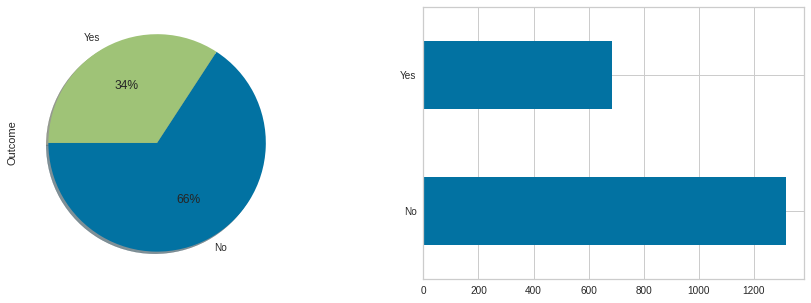

In [182]:
# sets 1 x 2 subplots with figure size of (14,5)
fig, ax = plt.subplots( 1, 2, figsize = (15,5))

# plots pie chart of Outcome column with % percentage
df.Outcome.value_counts().plot.pie(autopct="%.0f%%", shadow=True, startangle=180, ax=ax[0])

# plots bar chart of Outcome column value counts
df.Outcome.value_counts().plot.barh(ax = ax[1])

plt.show() # shows the plot

# Pregnancies

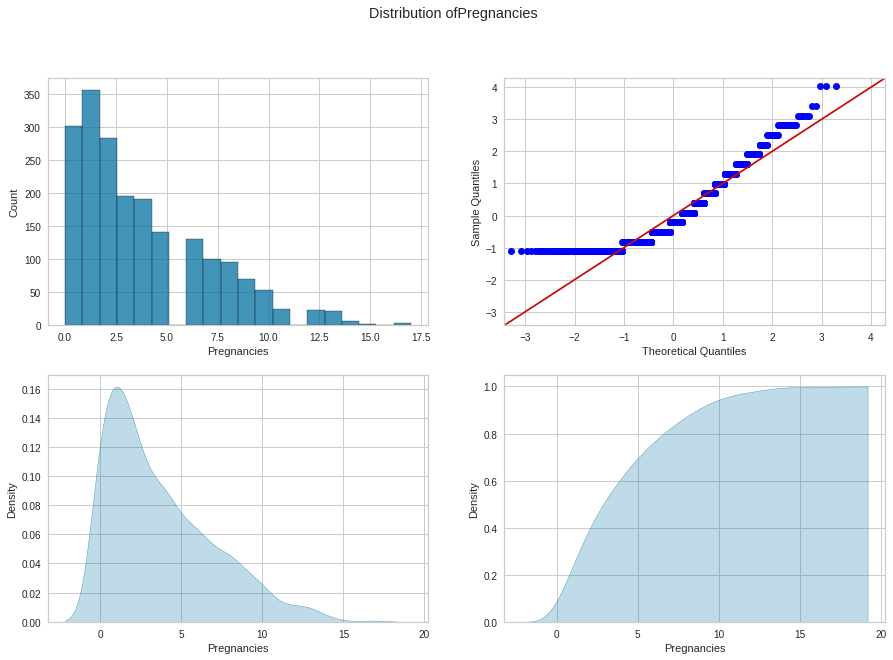

In [183]:
plot_distribution('Pregnancies')

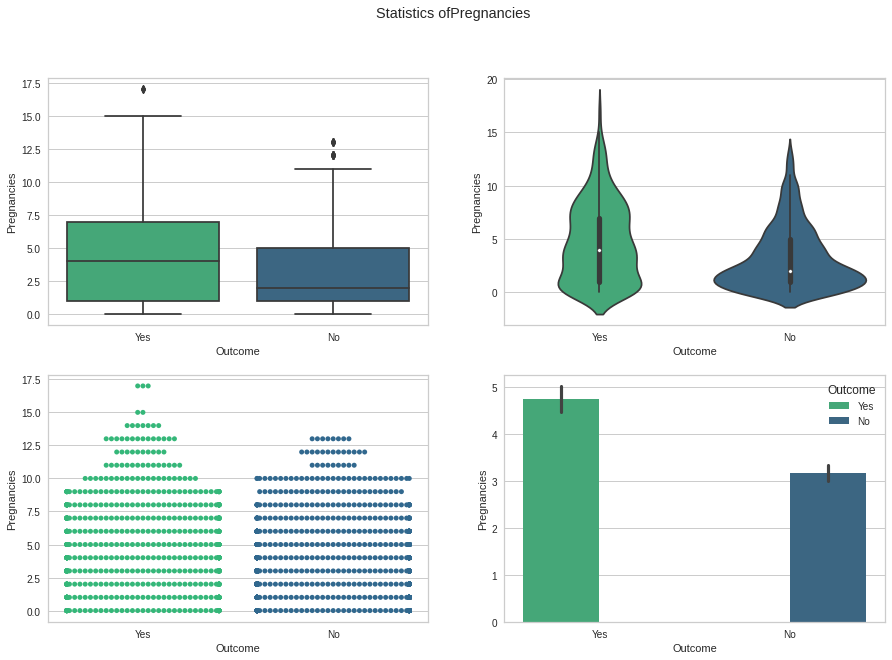

In [184]:
plot_stats('Pregnancies')

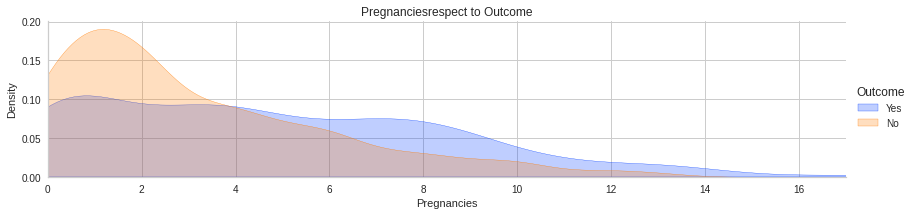

In [185]:
plot_kde('Pregnancies')

# Glucose

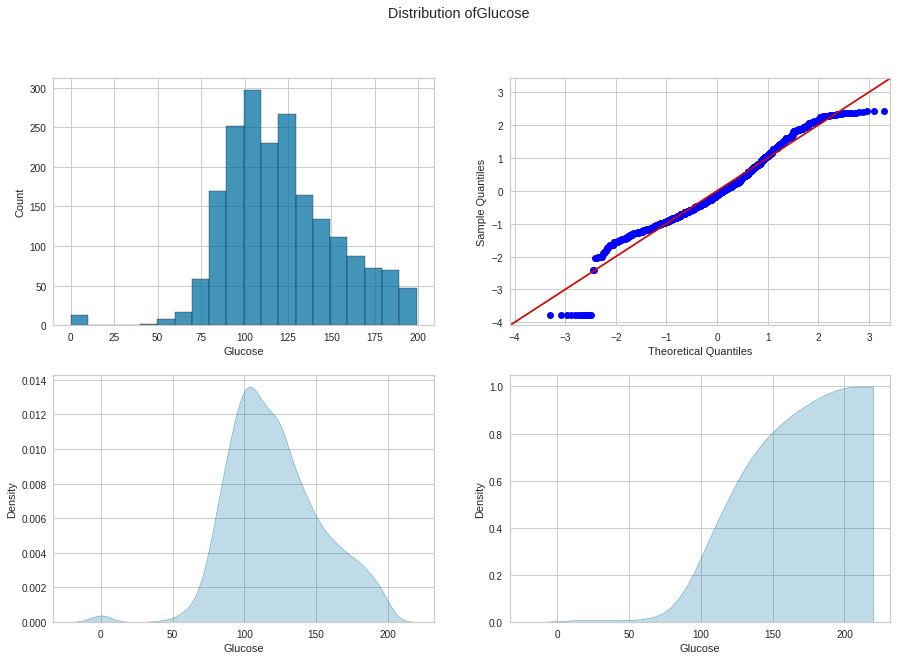

In [186]:
plot_distribution('Glucose')

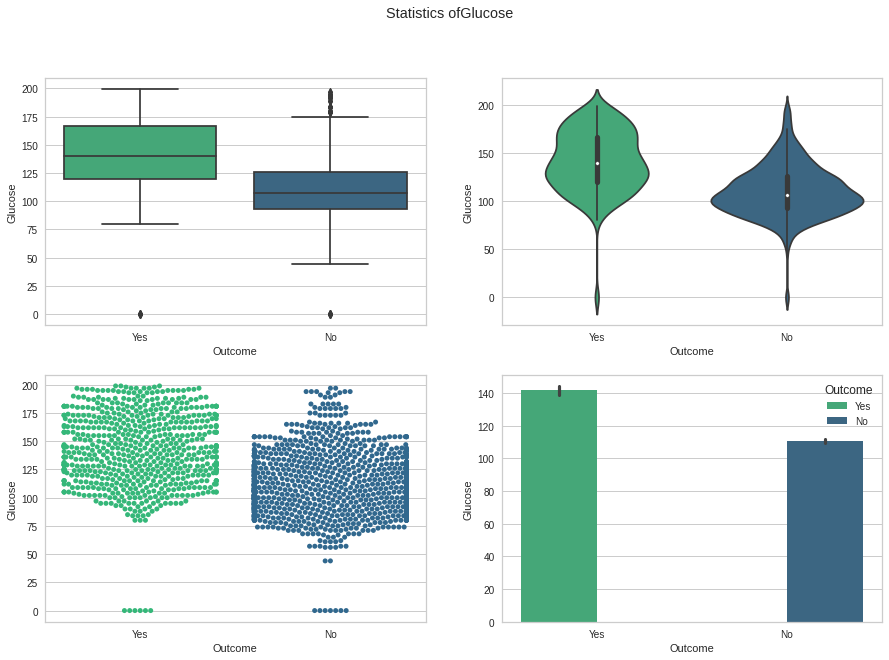

In [187]:
plot_stats('Glucose')

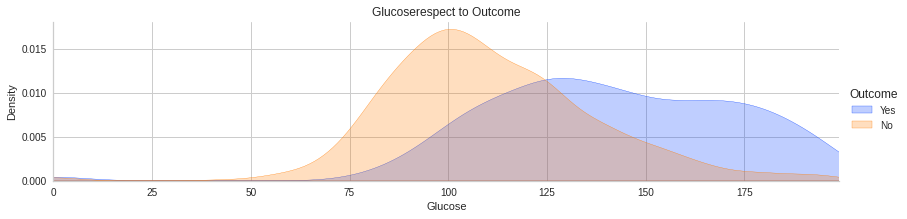

In [188]:
plot_kde('Glucose')

# BloodPressure

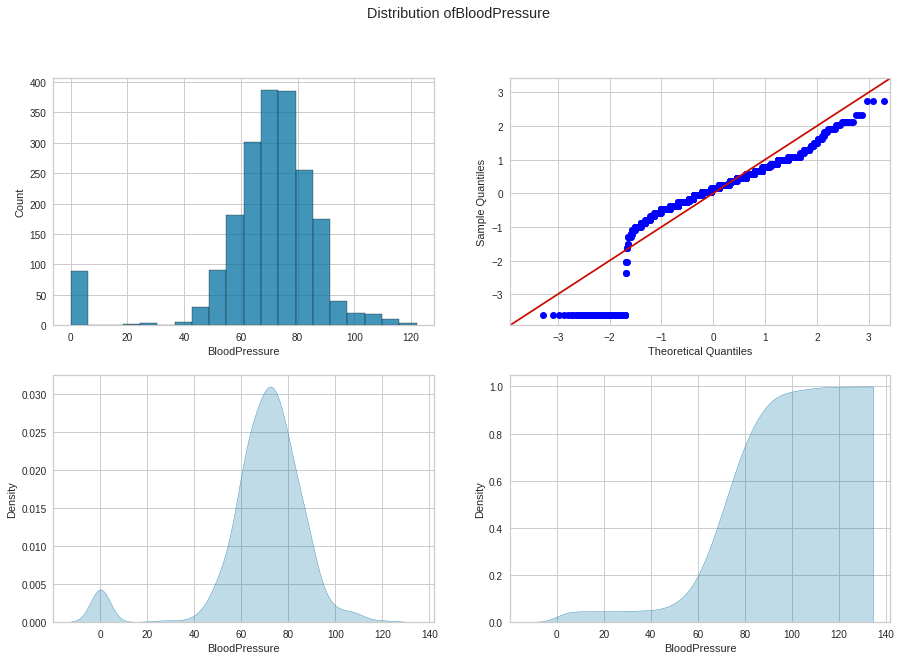

In [189]:
plot_distribution('BloodPressure')

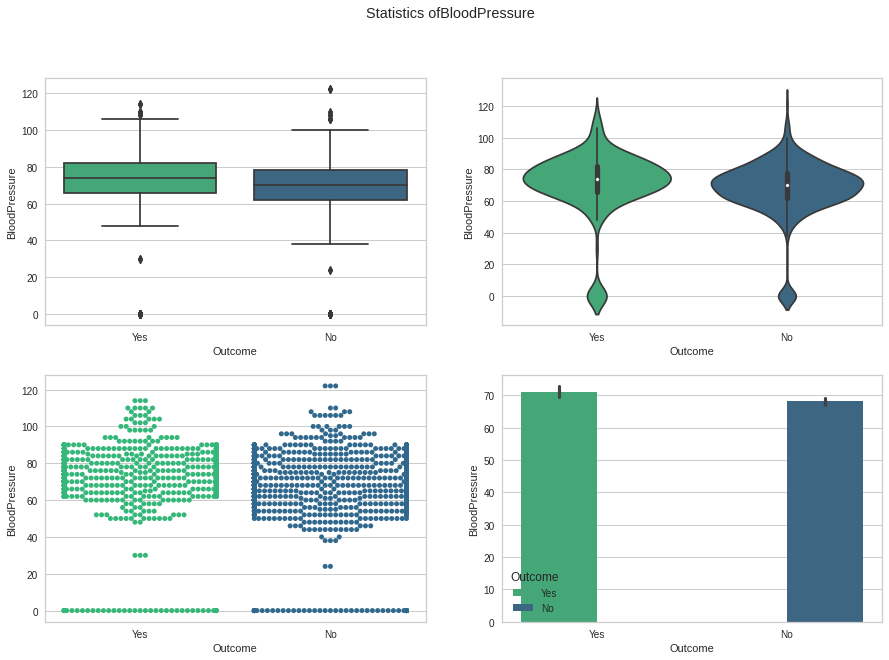

In [190]:
plot_stats('BloodPressure')

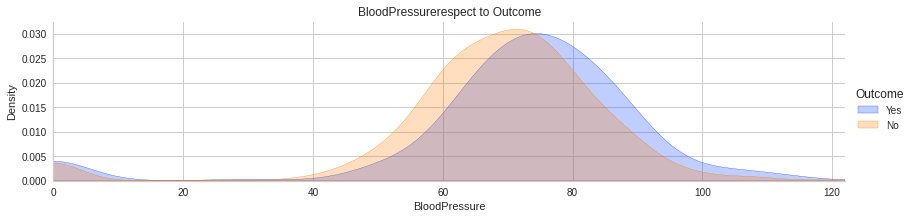

In [191]:
plot_kde('BloodPressure')

# SkinThickness

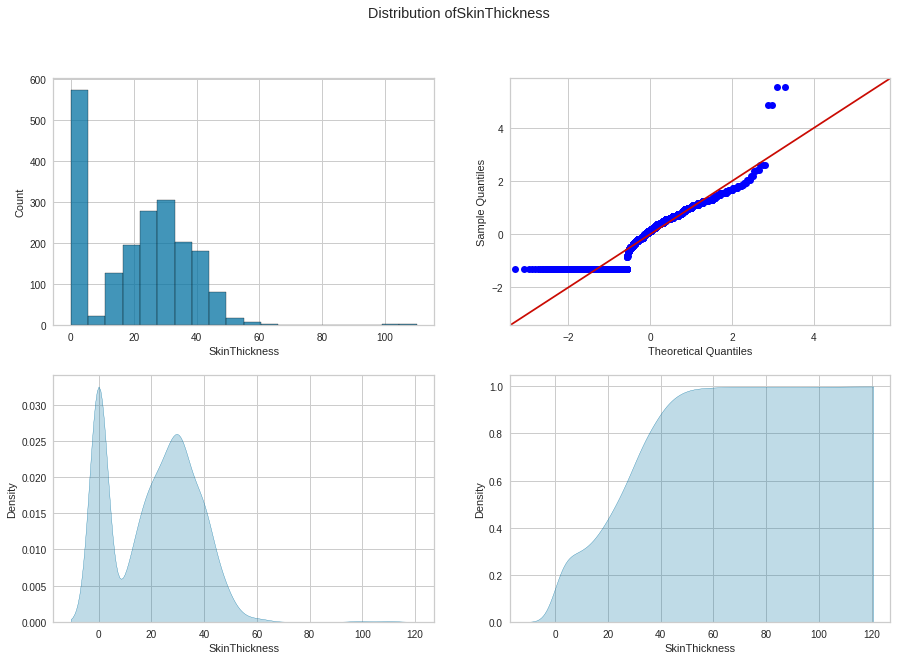

In [192]:
plot_distribution('SkinThickness')

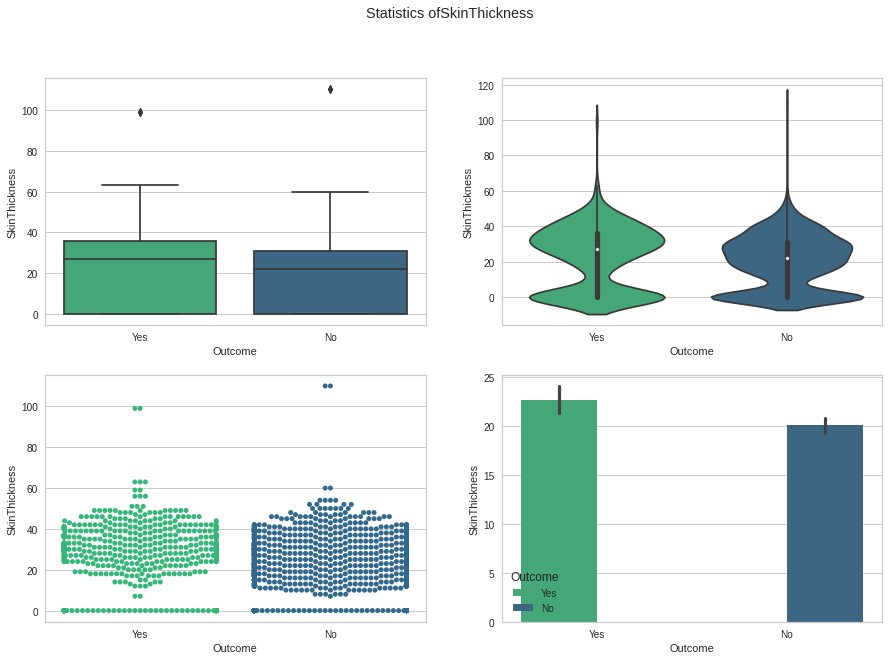

In [193]:
plot_stats('SkinThickness')

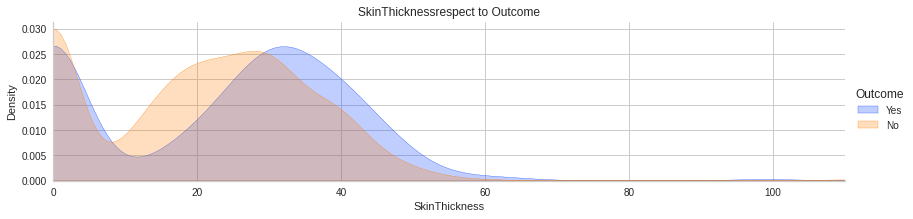

In [194]:
plot_kde('SkinThickness')

# Insulin

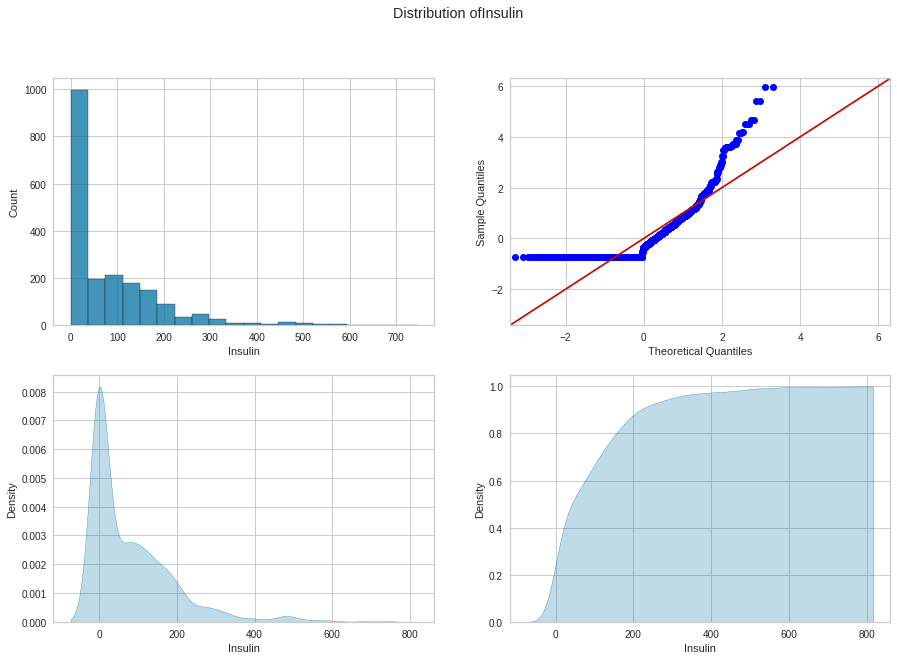

In [195]:
plot_distribution('Insulin')

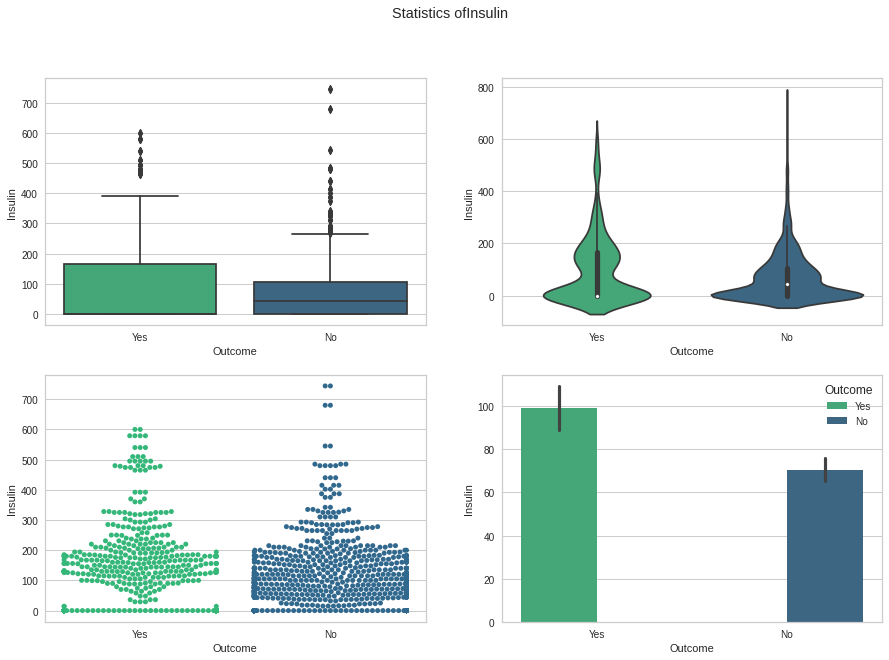

In [196]:
plot_stats('Insulin')

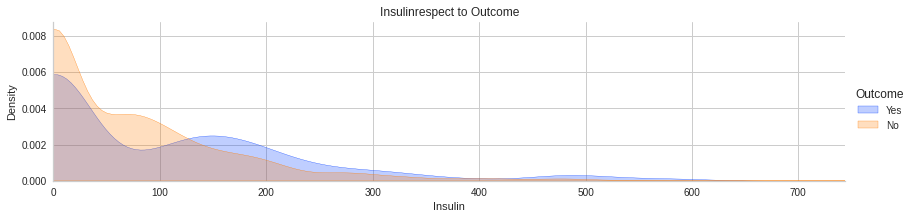

In [197]:
plot_kde('Insulin')

# BMI

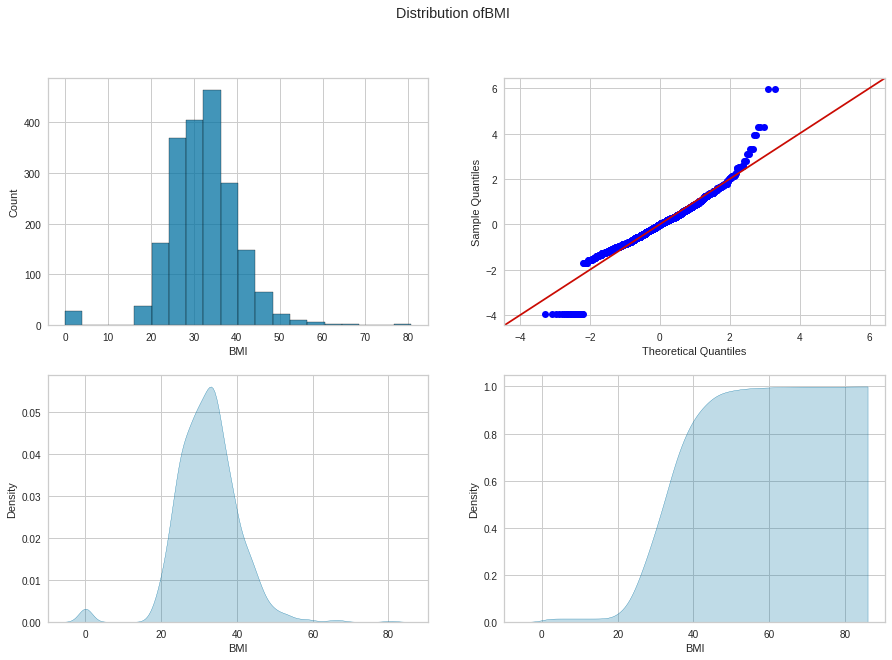

In [198]:
plot_distribution('BMI')

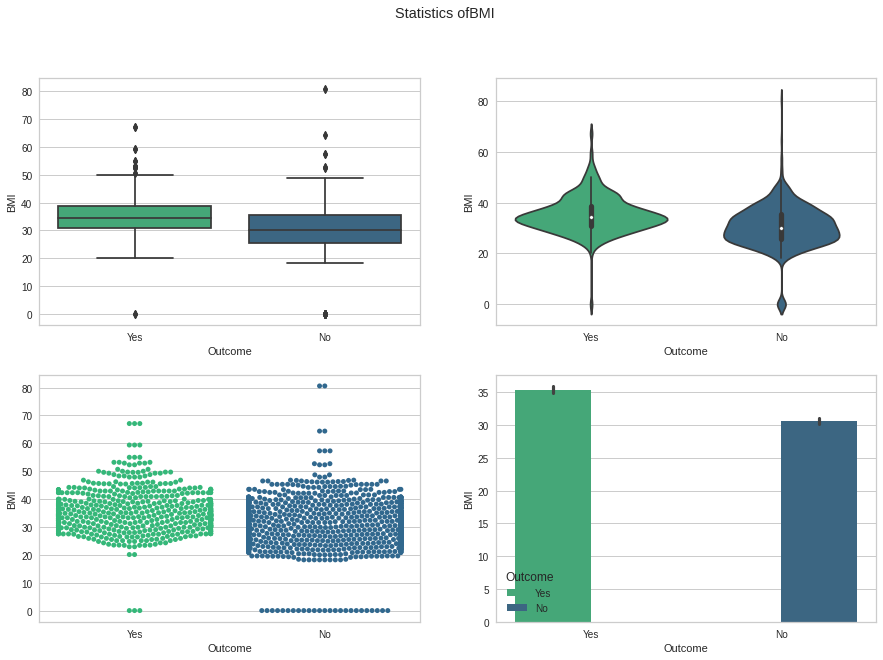

In [199]:
plot_stats('BMI')

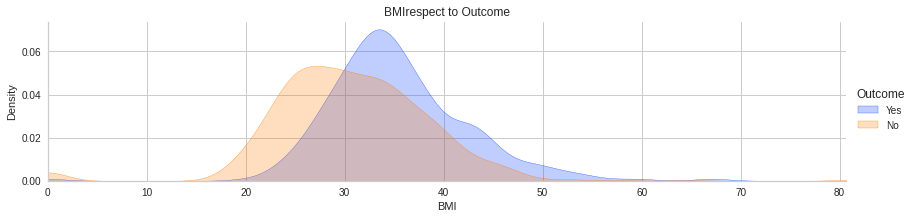

In [200]:
plot_kde('BMI')

# DPF

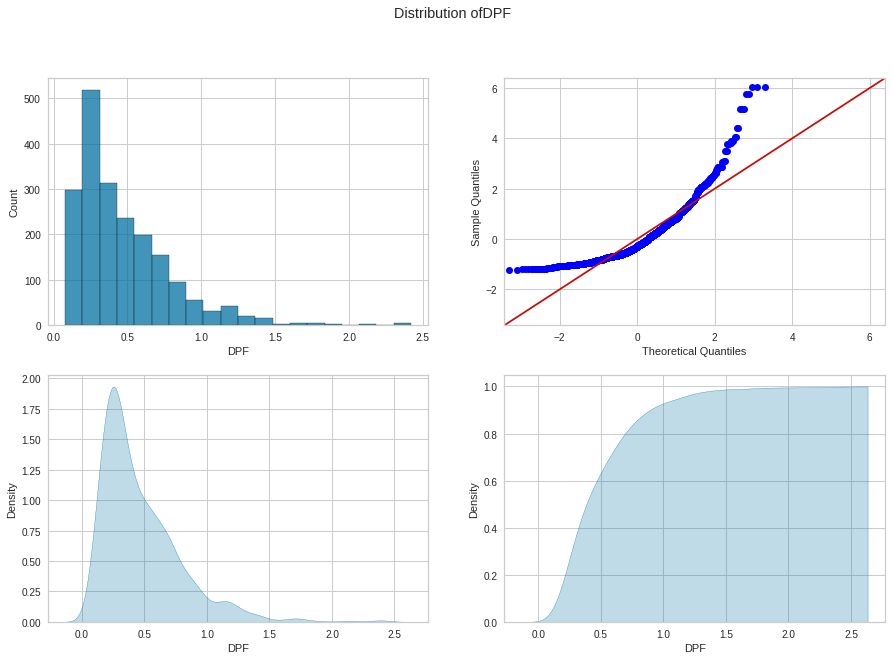

In [201]:
plot_distribution('DPF')

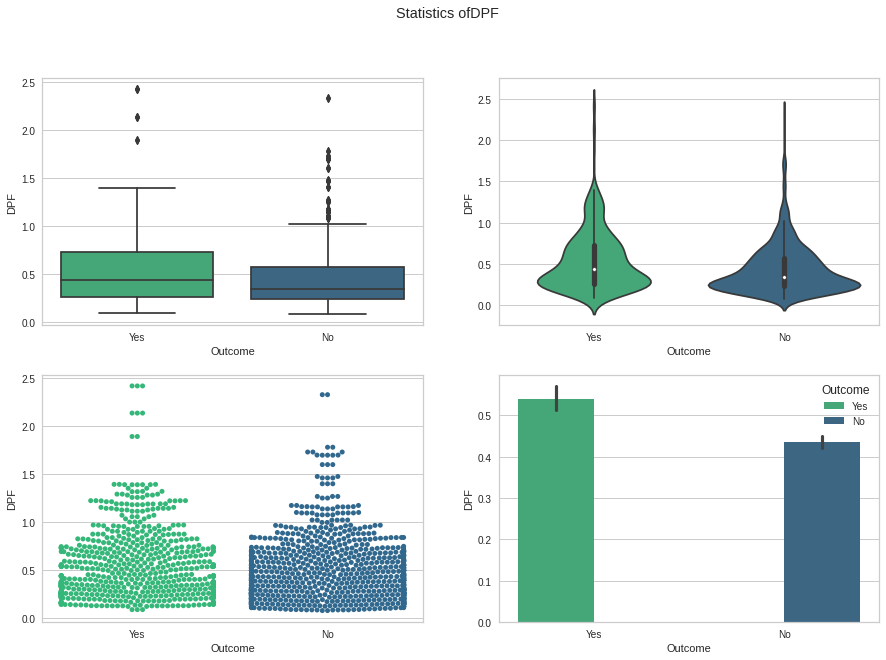

In [202]:
plot_stats('DPF')

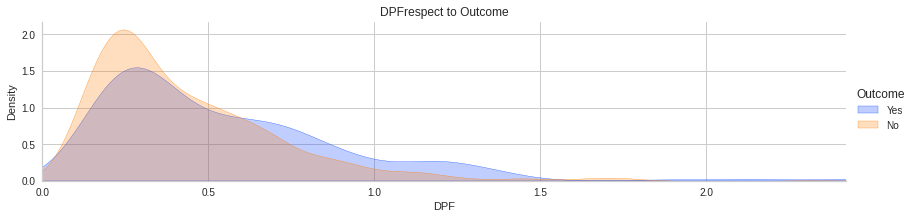

In [203]:
plot_kde('DPF')

# Age

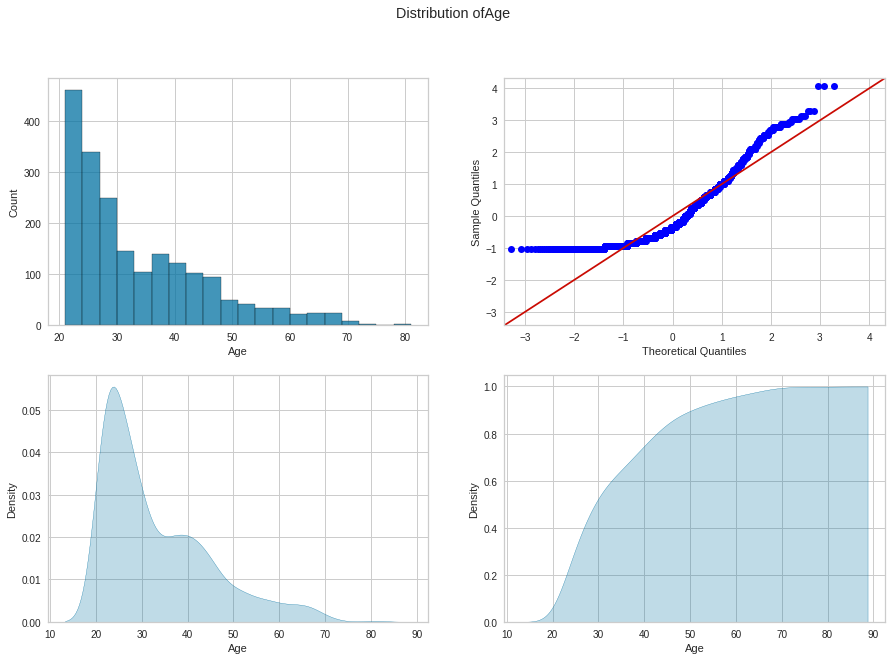

In [204]:
plot_distribution('Age')

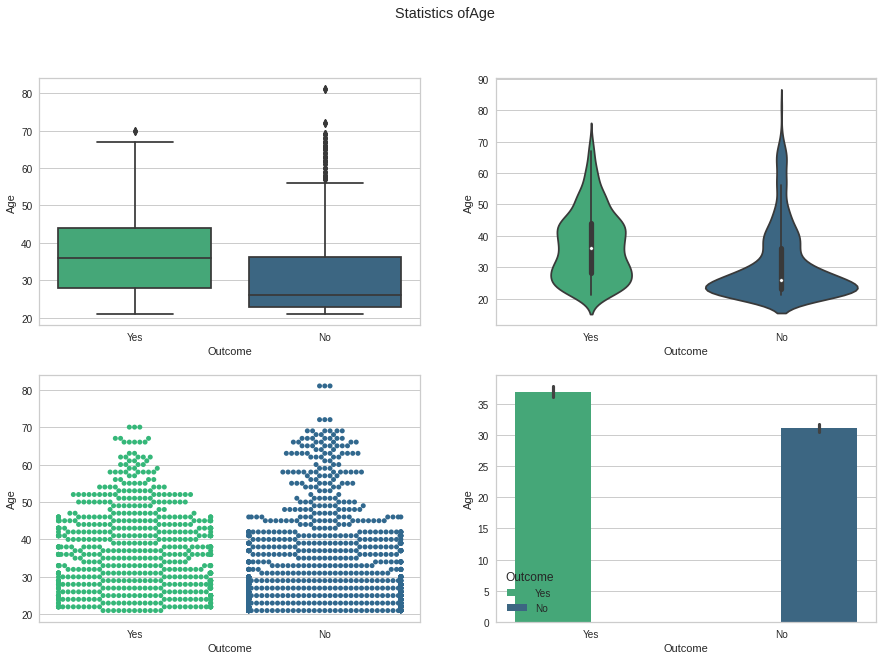

In [205]:
plot_stats('Age')

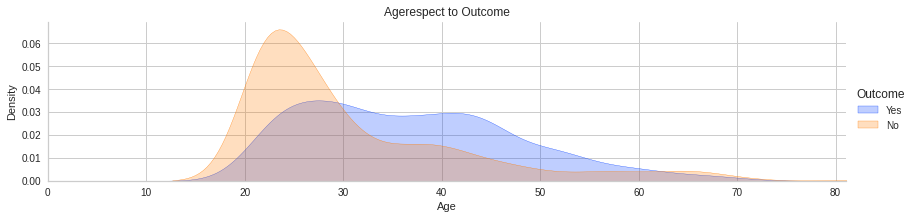

In [206]:
plot_kde('Age')

# Pair Plot

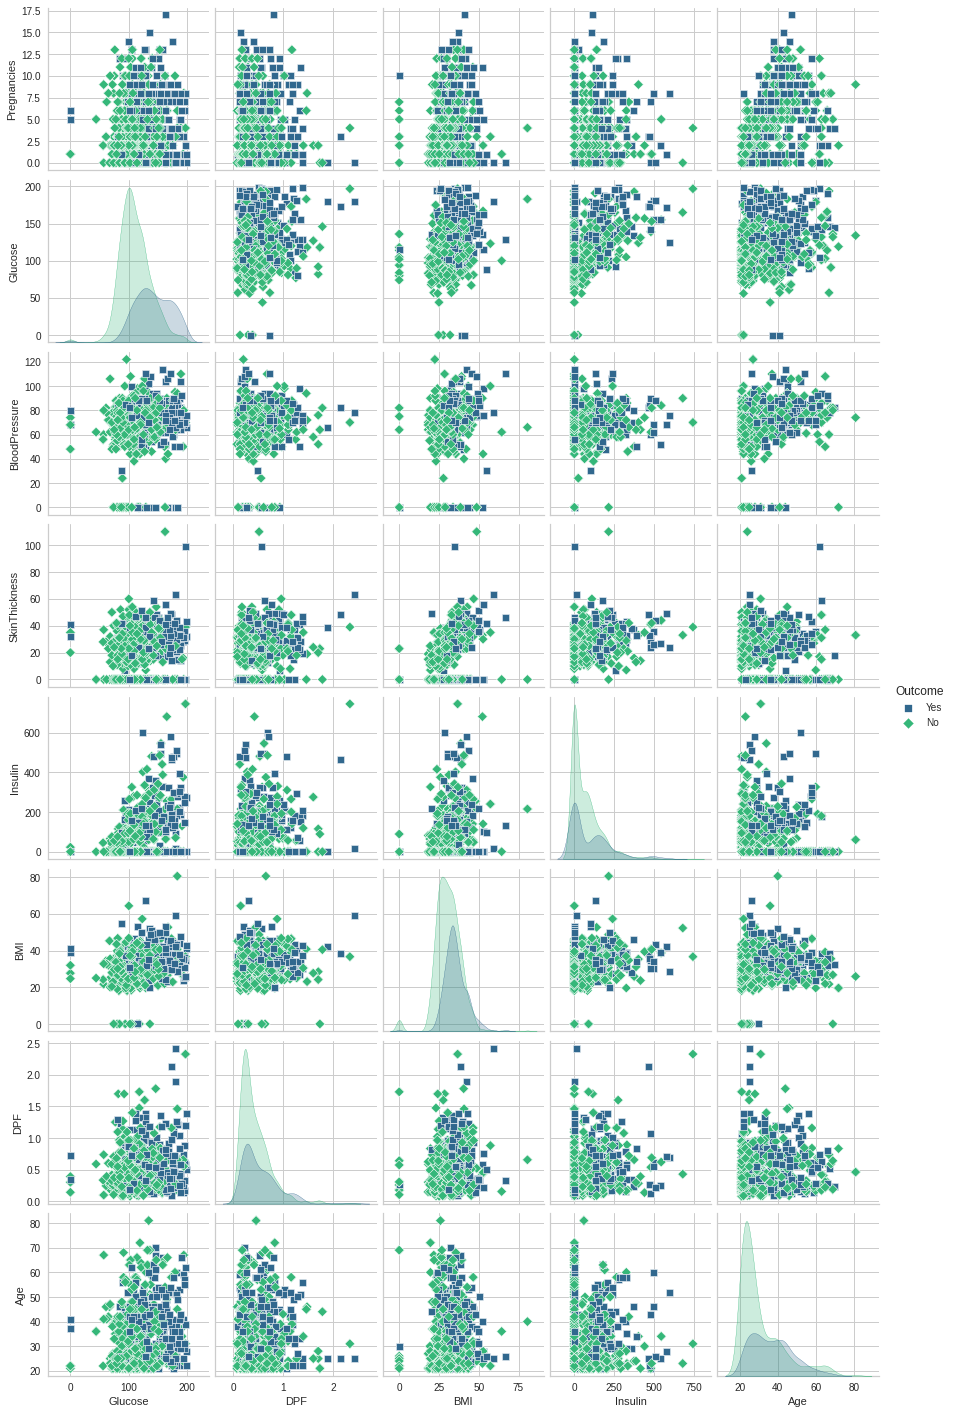

In [207]:
# pairplot with given columns in x axis and all columns in y axis
sns.pairplot(df, hue = 'Outcome', x_vars = ["Glucose", "DPF", "BMI", "Insulin", "Age"], markers = ["s","D"], palette="viridis")

plt.show() # shows the plot

# Feature Engineering

In [221]:
 # To replace the 0 values present in 'BloodPressure', 'SkinThickness', 'Insulin', 'Glucose',  'BMI' features

[
     df.loc[df[column] == 0,column].count() for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"]
]

[0, 0, 0, 0, 0]

In [271]:
# we replace zeros with mean, median depending upon distribution

df["SkinThickness"] = np.where( df["SkinThickness"] == 0, df["SkinThickness"].median(), df["SkinThickness"])

df[ "BloodPressure"] = np.where( df[ "BloodPressure"] == 0, df[ "BloodPressure"].mean(), df[ "BloodPressure"])

df["Insulin"] = np.where( df["Insulin"] == 0, df["Insulin"].median(), df["Insulin"])

df["Glucose"] = np.where( df["Glucose"] == 0, df["Glucose"].mean(), df["Glucose"])

df["BMI"] = np.where( df["BMI"] == 0, df["BMI"].median(), df["BMI"])

In [272]:
# Checking the number of 0 values present

[
    df.loc[df[column] == 0, column].count() for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"]
]

[0, 0, 0, 0, 0]

In [273]:
df.Outcome.replace(to_replace = { 'No' : 0, 'Yes' : 1},inplace = True) #Replacing NO,YES with 0,1

# Correlation

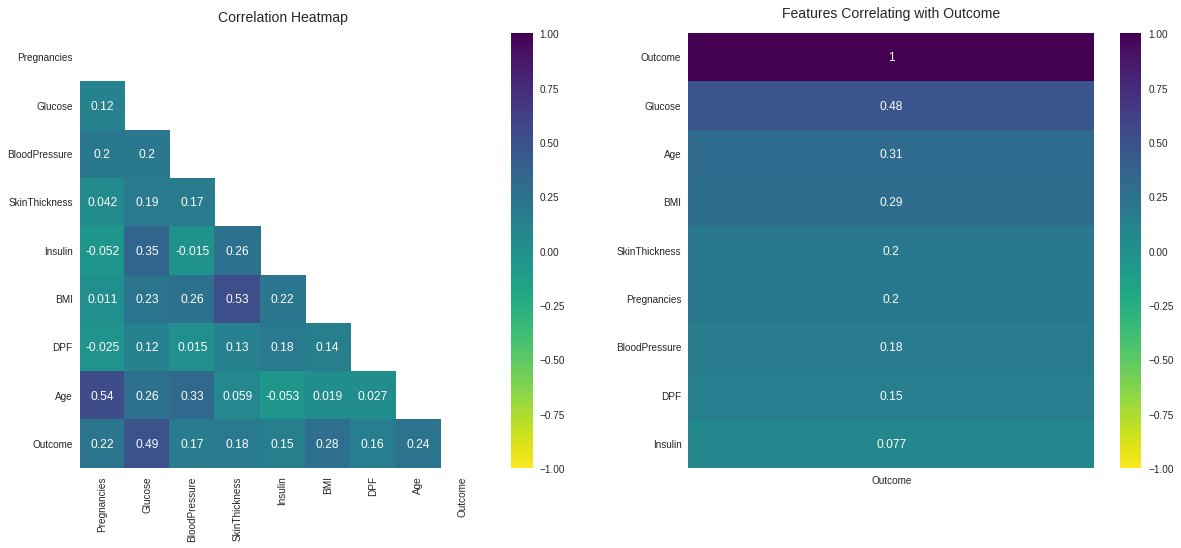

In [274]:
# create a 1 x 2 subplot grid
fig, ax = plt.subplots( ncols=2, figsize=(20, 8) ) 

# calculate spearman correlation of the dataframe
resign_corr = df.corr( method="spearman" ) 

mask = np.triu( np.ones_like(resign_corr, dtype=np.bool) )

# cornor heatmap of the dataframe correlation
cat_heatmap = sns.heatmap( df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="viridis_r" )  

# sets the title for the heatmap with font size 14 and padding 12
cat_heatmap.set_title( "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12 ) 

# create heatmap for features correlating with the dependant varibale 'Outcome'
heatmap = sns.heatmap( resign_corr[["Outcome"]].sort_values(by="Outcome", ascending=False),vmin=-1,vmax=1,
                       annot=True,ax=ax[1],cmap="viridis_r" )  

# sets the title for the heatmap with font size 14 and padding 16
heatmap.set_title( "Features Correlating with Outcome",fontdict={"fontsize": 14},pad=16 )

plt.show() # shows the subplot

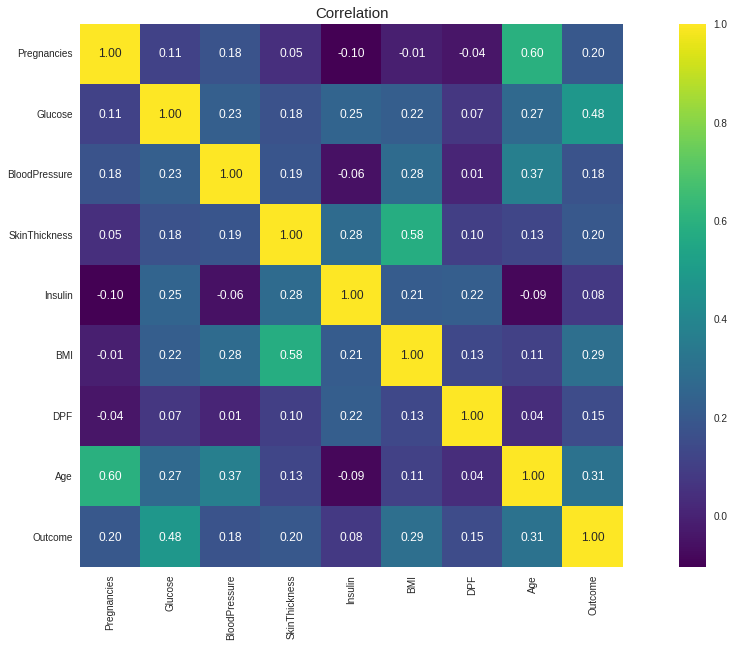

In [275]:
# create a spearman correlation heatmap with figure size (20, 10)
plt.figure(figsize=(20, 10))

sns.heatmap(resign_corr, annot=True, fmt=".2f", square=True, cmap="viridis")

plt.title("Correlation", size=15)

plt.show()

# Data Splitting

In [276]:
X = df.drop(["Outcome"],axis = 1) # X contains all independant variables
y = df["Outcome"] # Y contains only the dependant variable

In [277]:
X[ : 5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,2,138.0,62.0000,35.0,40.0,33.6,0.127,47
1,0,84.0,82.0000,31.0,125.0,38.2,0.233,23
2,0,145.0,69.1455,23.0,40.0,44.2,0.630,31
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24
4,1,139.0,62.0000,41.0,480.0,40.7,0.536,21


In [278]:
y[ : 5]

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

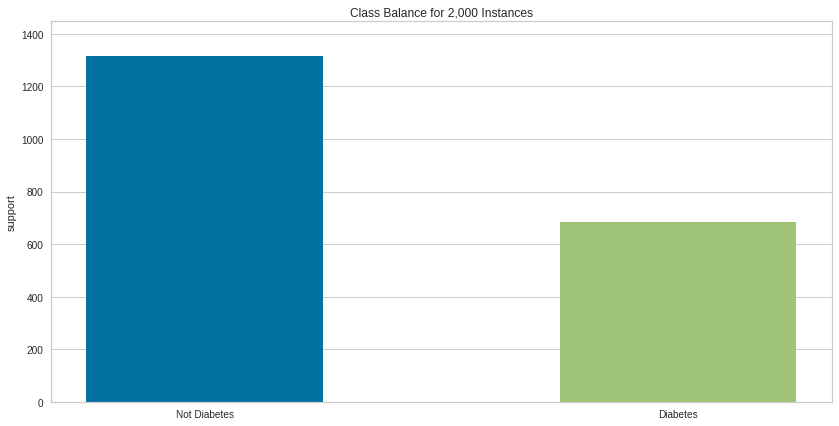

In [279]:
# Class balance between dependant column 'Outcome' values
from yellowbrick.target import ClassBalance

classes = ["Not Diabetes", "Diabetes"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes)
viz.fit(y)
viz.show()
plt.show()

# Sampling Imbalanced Data

In [280]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

# To make the dependant variable balanced using SMOTETomek method
smt = combine.SMOTETomek(random_state=14)

# resampling the dataset
X, y = smt.fit_resample(X, y) 

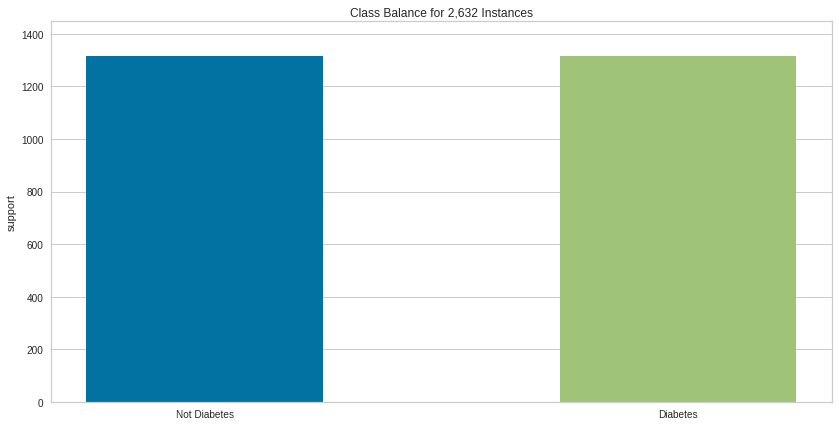

In [281]:
# rechecking Balance after Sampling
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes)
viz.fit(y)
viz.show()
plt.show()

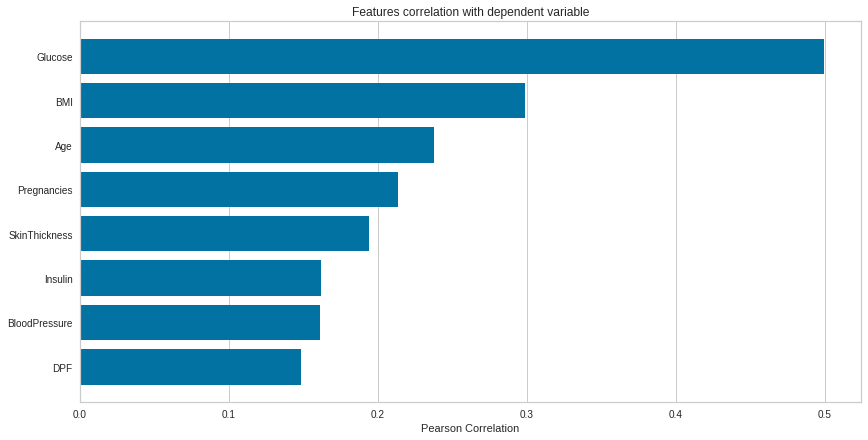

In [282]:
# displays the Features correlation with dependant variable 'Outcome' as a barplot using pearson correlation method
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="pearson", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

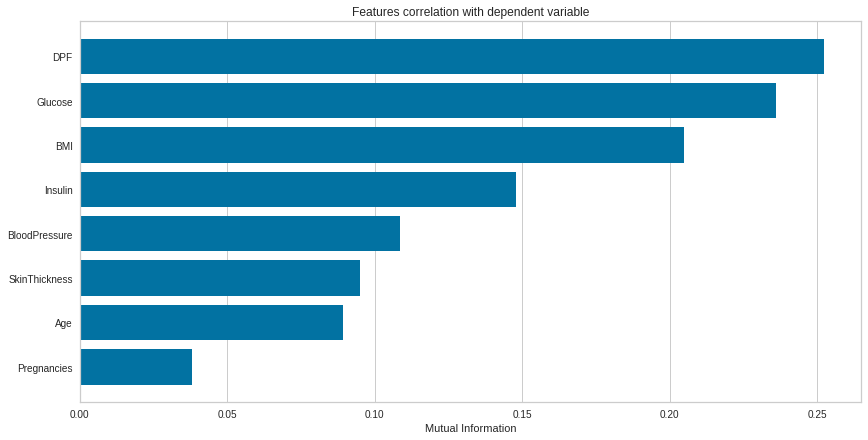

In [283]:
# displays the Features correlation with dependant variable 'Outcome' as a barplot using mutual info classification method
plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="mutual_info-classification", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [284]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

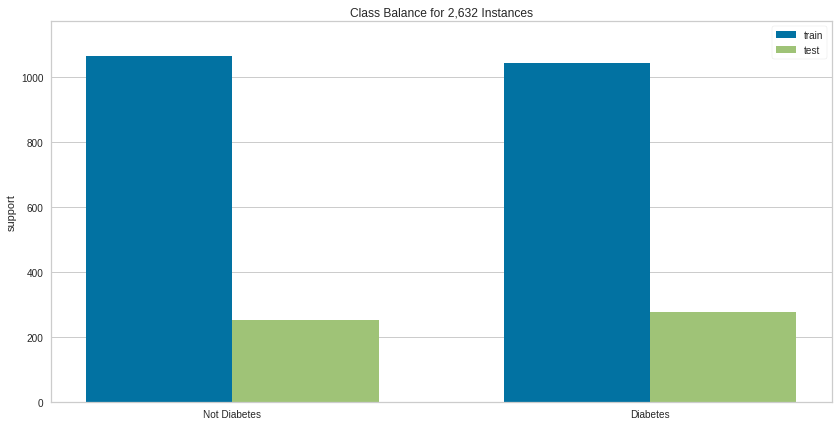

In [285]:
# displays Class balance between training & testing sets
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes)
viz.fit(y_train, y_test)
viz.show()
plt.show()

# Model Fitting

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [287]:
# fitting the random forest model
rf_clf = RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train, y_train)

In [288]:
y_pred = rf_clf.predict(X_test)

**Accuracy:**

In [289]:
print(accuracy_score(y_test, y_pred))

0.9620493358633776


**Error:**

In [290]:
print(1 - accuracy_score(y_test, y_pred))

0.0379506641366224


**Recall:**

In [291]:
print(recall_score(y_test, y_pred))

0.96


**Precision:**

In [292]:
print(precision_score(y_test, y_pred))

0.967032967032967


**F1** **Score:**

In [293]:
print(f1_score(y_test, y_pred))

0.9635036496350364


***Class*** ***prediction*** ***Error:***

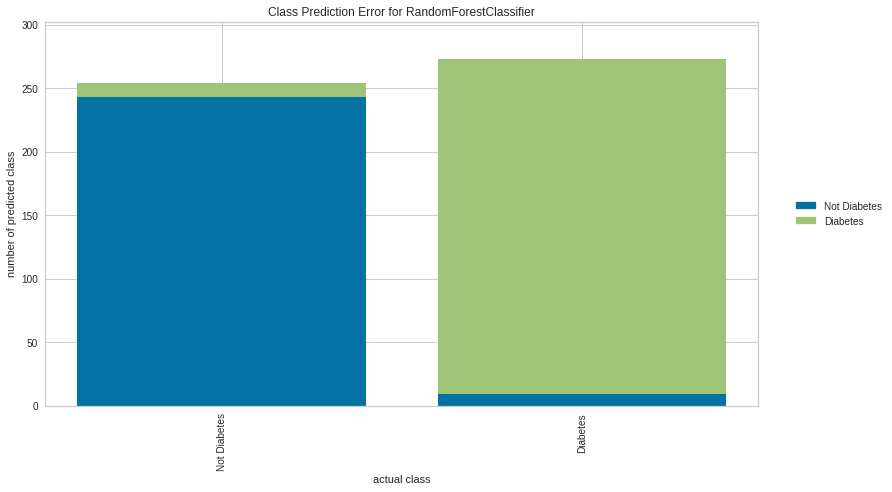

In [295]:
from yellowbrick.classifier import class_prediction_error

plt.figure(figsize=(14, 7))
visualizer = class_prediction_error( rf_clf, X_train, y_train, X_test, y_test, classes=classes )
visualizer.show()
plt.show()

**Roc** **Curve:**

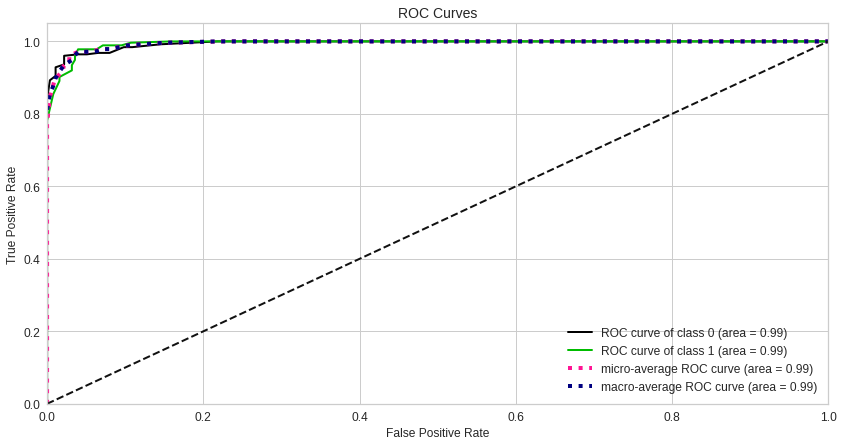

In [297]:
from scikitplot.metrics import (
    plot_cumulative_gain,
    plot_lift_curve,
    plot_roc,
    plot_precision_recall,
    plot_confusion_matrix,
)
from scikitplot.estimators import plot_learning_curve

y_probas = rf_clf.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Precision Recall Curve:**

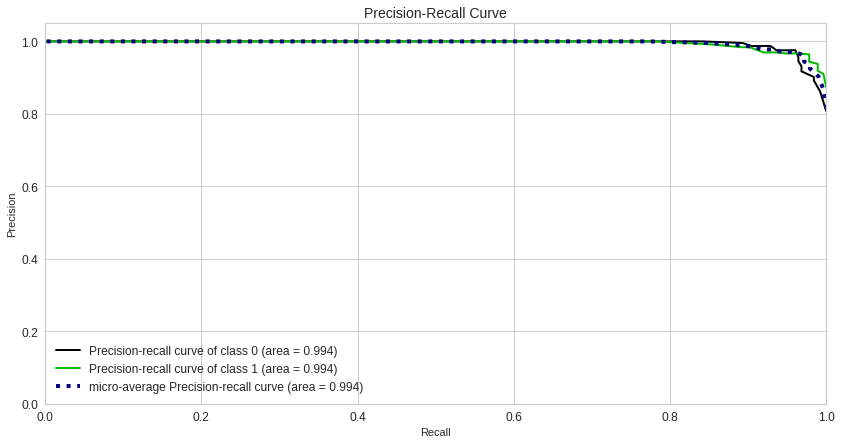

In [298]:
plot_precision_recall(y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Learning Curve:**

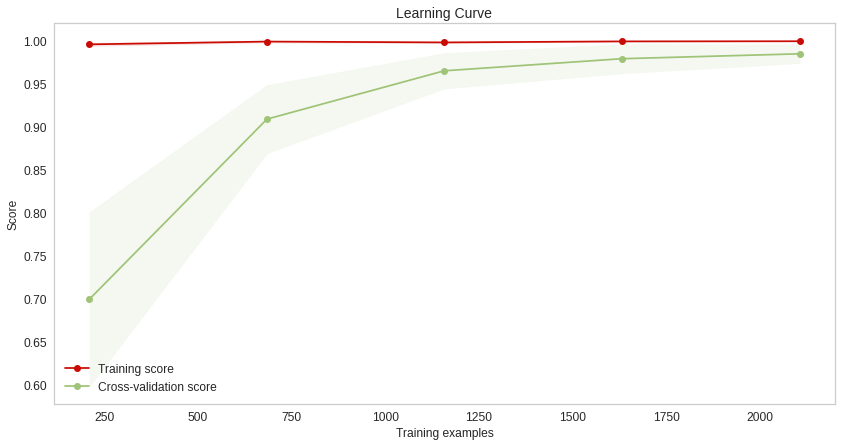

In [299]:
plot_learning_curve(rf_clf, X, y, figsize=(14, 7), title_fontsize=14, text_fontsize=12)
plt.show()

**Lift Curve:**

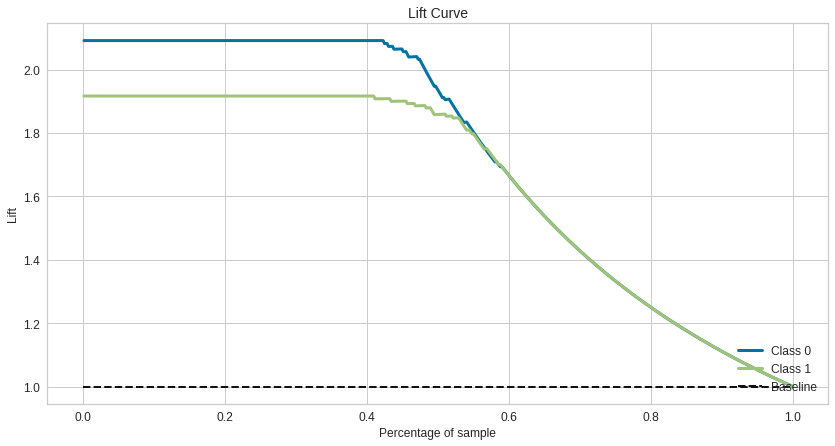

In [300]:
plot_lift_curve( y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12 )
plt.show()

**Cummulative Gains Curve:**

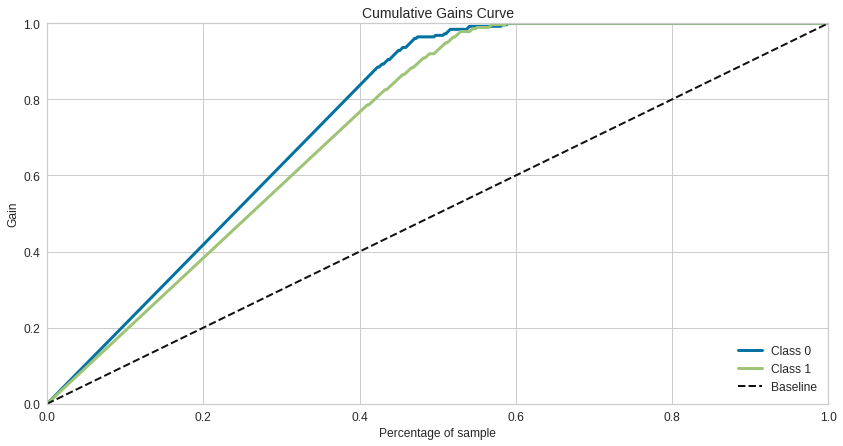

In [301]:
plot_cumulative_gain( y_test, y_probas, figsize=(14, 7), title_fontsize=14, text_fontsize=12 )
plt.show()

**Confusion** **Matrix**

In [302]:
confusion_matrix(y_test, y_pred)

array([[243,   9],
       [ 11, 264]])

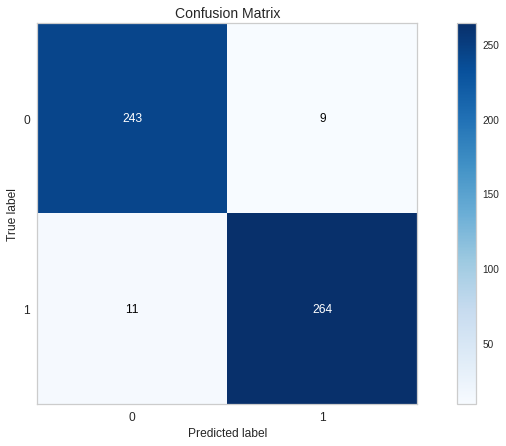

In [303]:
plot_confusion_matrix( y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12 )
plt.show()

**Classification** **Report**:

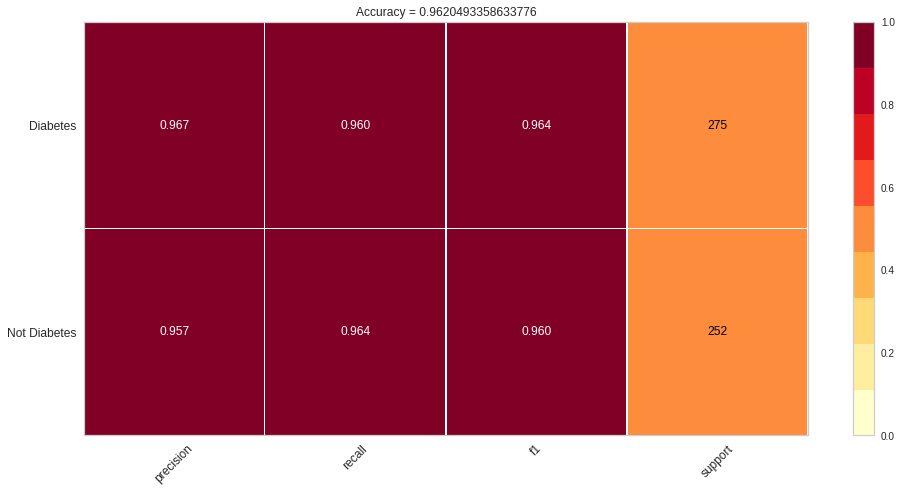

In [307]:
plt.figure(figsize=(14, 7))
visualizer = classification_report(
    rf_clf,
    X_train,
    y_train,
    X_test,
    y_test,
    classes=classes,
    support=True,
    title=f"Accuracy = {str(accuracy_score(y_test, y_pred))}"
)
plt.show()

# Predictions:

In [308]:
# function to predict using the trained model
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]

    return rf_clf.predict(x)

In [309]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
print("Oops! You have diabetes." if prediction else "Great! You don't have diabetes.")

Great! You don't have diabetes.


In [311]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
print("Oops! You have diabetes." if prediction else "Great! You don't have diabetes.")

Oops! You have diabetes.


# Saving the Model

In [312]:
import os
import joblib

if not os.path.exists("../models/"):
  os.mkdir("../models/")
joblib.dump(rf_clf,"../models/model.pkl")
print("Successfully Completed !")

Successfully Completed !
